1. Datasets 
  - Sysnthetic datasets in scikitlearn 
  - Low dimensional data vs High dimensional data 
2. Supervised Learning Algorithms 
   - k Nearest Neighbors
   - Generalized Linear Models 
   - GLMs with regularization - Lasso and Ridge GLMs
   - Kernel based support vector models 
   - Decision Trees 
   - Tree Ensembles (Bagging, Random Forest, Boosting with trees) 
   - Neural Networks  
3. Other Topics : 
  - Common Concepts Used in using these algorithms. 
   - Algorithm Classification 
     - Parametric/ Non Parametric 
     - Classification / Regression / Unsupervised
   - Bias vs Variance or Underfitting vs Overfitting   
     - Usually related to choice of model hyperparameters or train/test selection
4. Strengths vs Weaknesses of each algorithm  
5. Scikit-learn's general flow of modeling 

## 1. Data sets 
- Synthetic datastes in scikit learn can be generated for a varietry of tasks, like
  experimenting with regression and classification algorithms 
- Lower dimension data sets are useful to comprehend concepts like overfitting and undefitting 
- BUT sometimes they do not generalize well on a higher dimensional data set, because higher 
  dimensional data sets could be sparse (more on that to come)

In [47]:
import sklearn
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook 
from sklearn.datasets import make_classification, make_regression 

#### Simple classification dataset

<IPython.core.display.Javascript object>


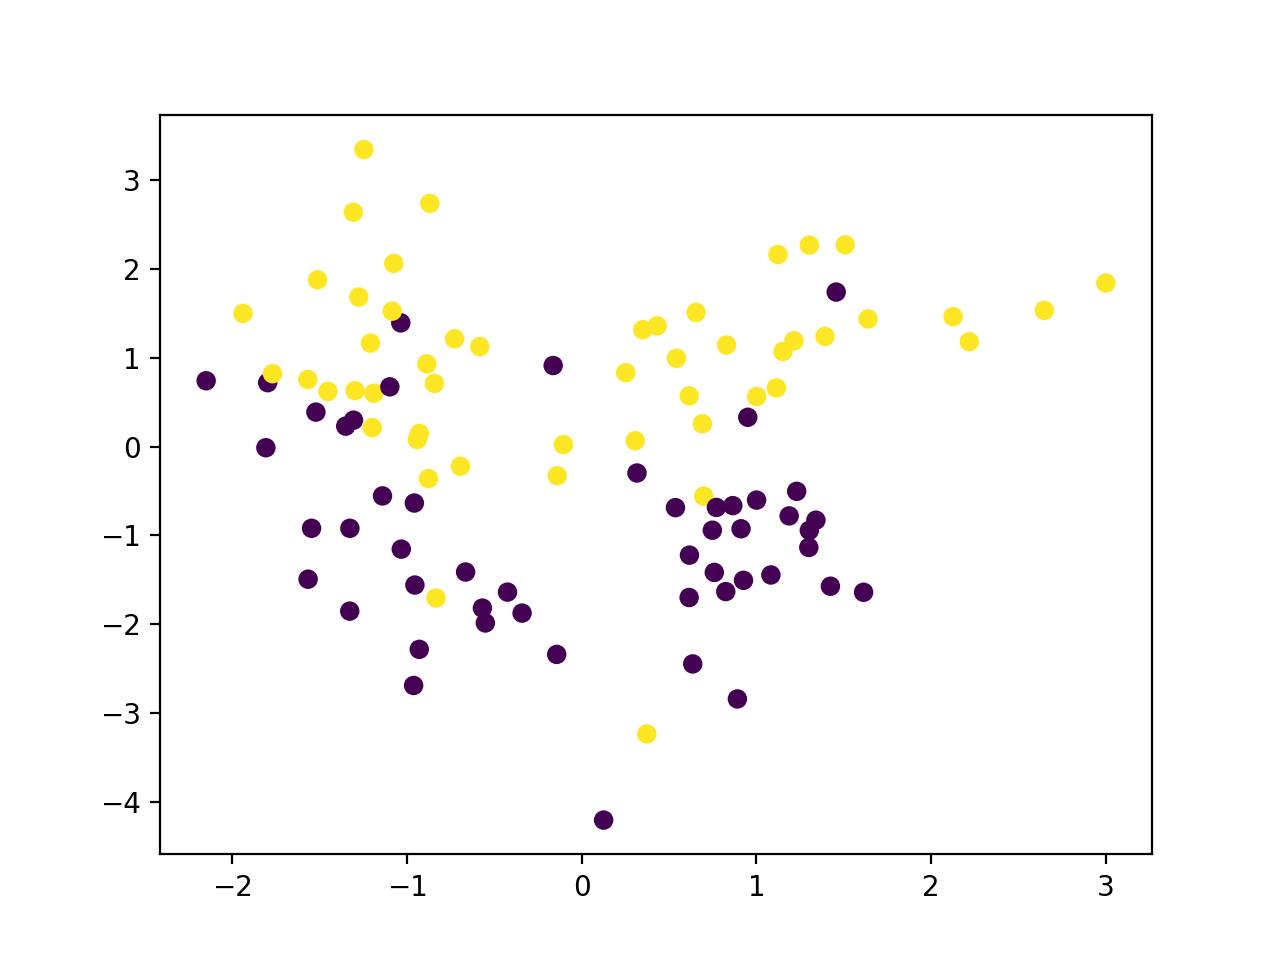

In [48]:
X, y = make_classification(n_classes= 2, n_samples= 100, n_features= 2,
                           flip_y= 0.01,n_informative= 2, n_redundant= 0)
plt.figure()
plt.scatter(x = X[:,0], y = X[:,1], c = y)

#### Complex classification dataset

<IPython.core.display.Javascript object>


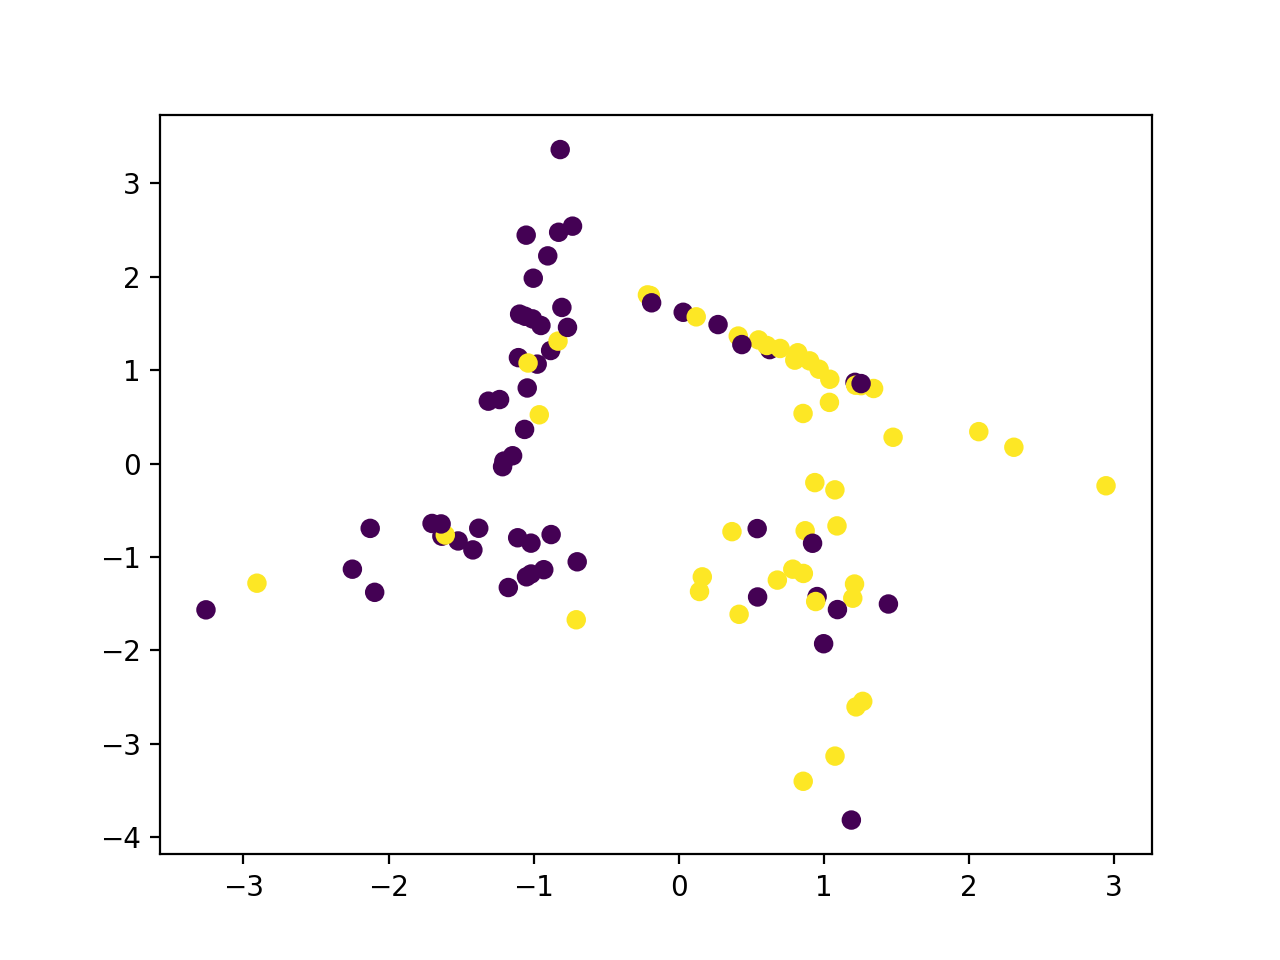

In [49]:
X, y = make_classification(n_classes= 2, n_samples= 100, n_features= 2,
                           flip_y= 0.5,n_informative= 2, n_redundant= 0)
from matplotlib import pyplot as plt
%matplotlib notebook 
plt.figure()
plt.scatter(x = X[:,0], y = X[:,1], c = y)

#### Dataset for clusters

In [50]:
from sklearn.datasets import make_blobs

<IPython.core.display.Javascript object>


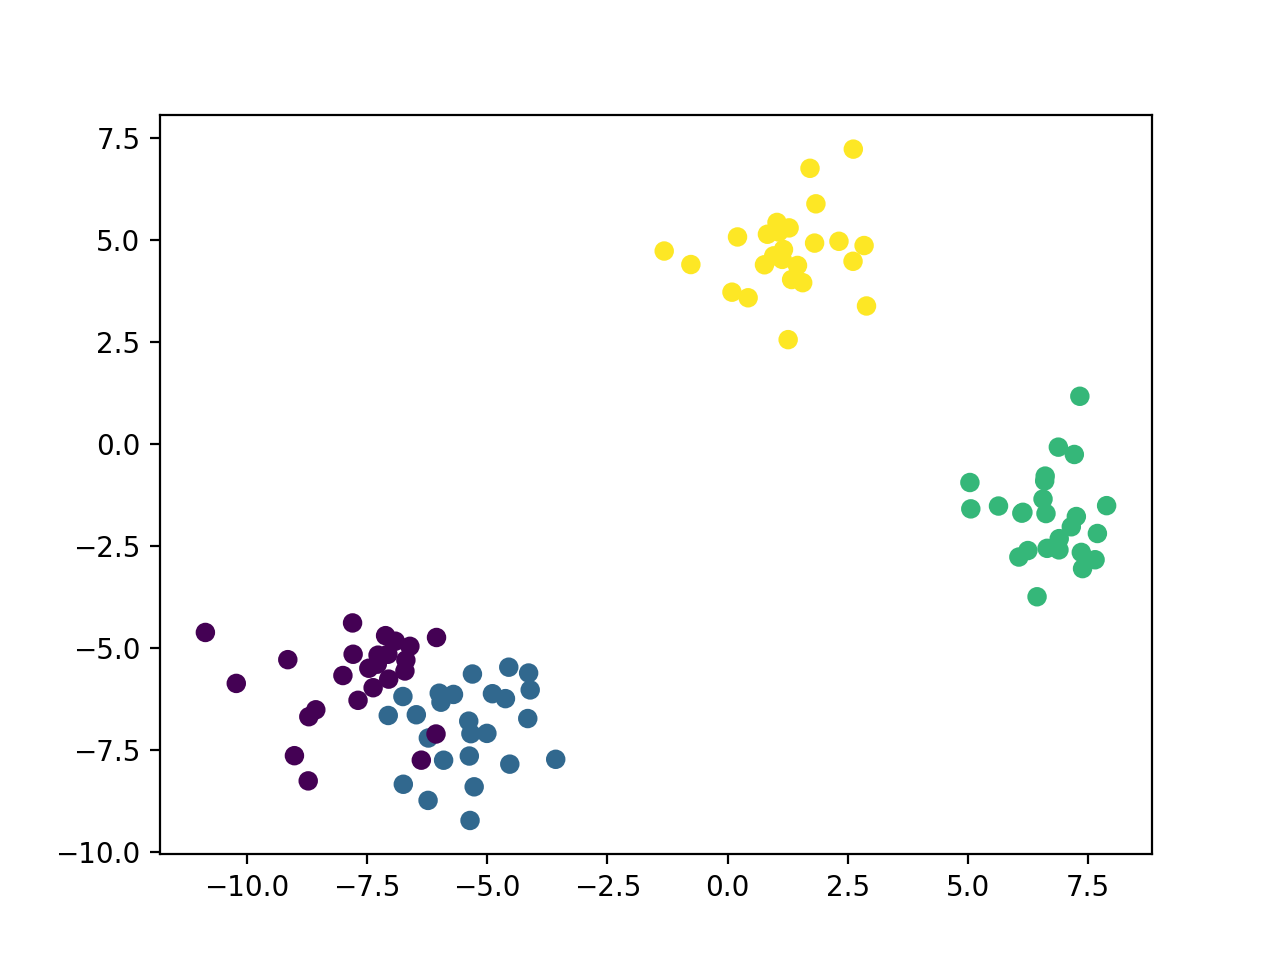

In [51]:
X,y = make_blobs(n_samples= 100, n_features= 2, centers= 4, random_state= 121)
plt.figure()
plt.scatter(x = X[:,0], y = X[:,1], c = y)

#### Dataset for regression

<IPython.core.display.Javascript object>


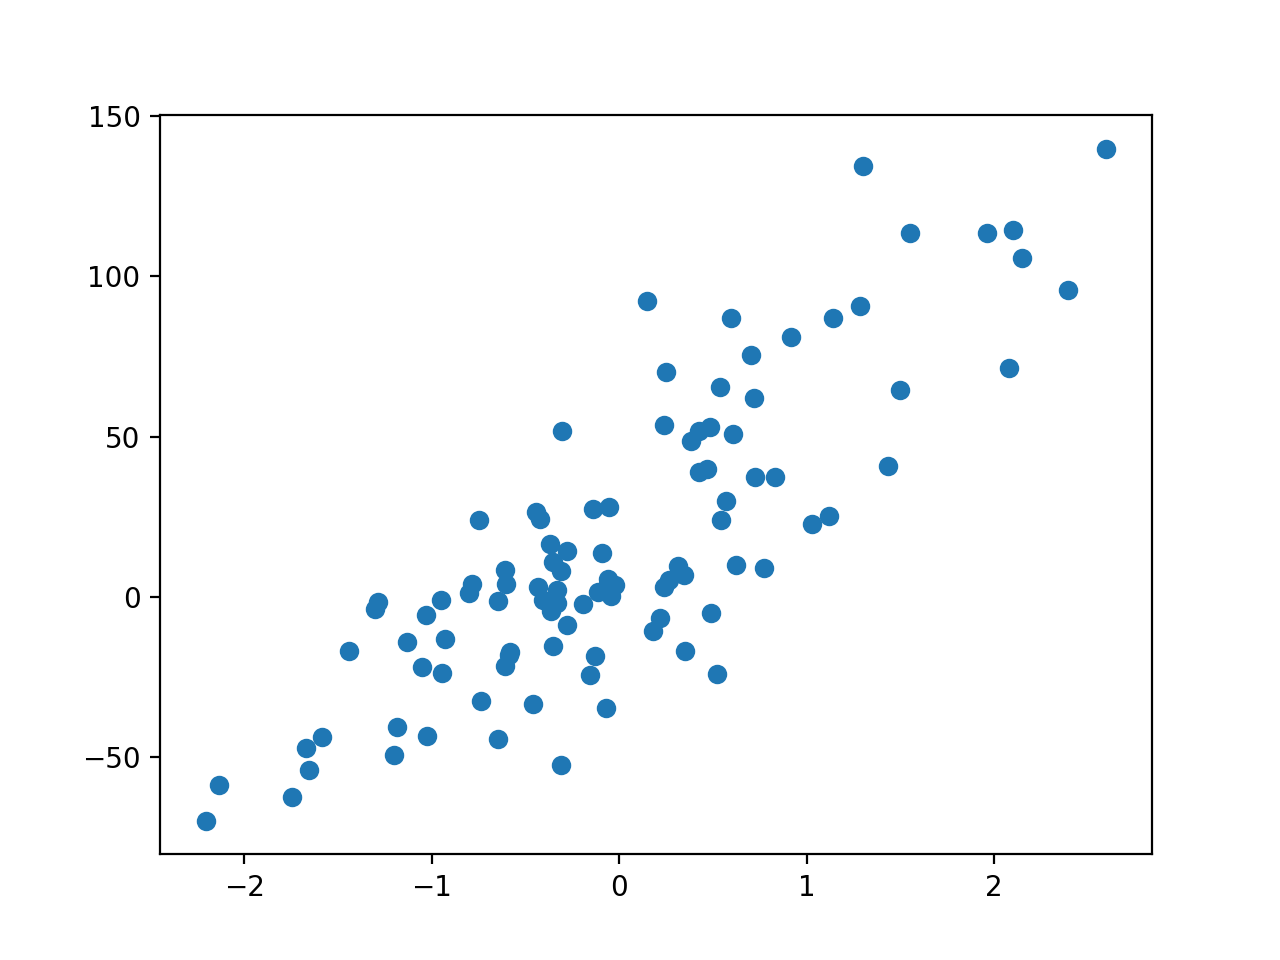

In [52]:
X,y = make_regression(n_samples= 100, n_features= 1, n_informative= 1,bias = 10, noise = 30, random_state= 111)
plt.figure()
plt.scatter(X,y)

## 2 . Supervised Learning Algorithms

### 2.1 kNearest Neighbors for classification and regression
#### a. kNN for classification 
- Algorithm 
- Application 
  - Synthetic data set, divide into train and test 
  - Show overfitting and underfitting, and how a balance can be achieved 
    - Use visual representation of decision boundaries to explain  
    
#### b. kNN for regression  
- same as above 

#### c. Pros and cons of knn

#### a.1 Algorithm  - TBD
- Brief overview : http://localhost:8888/notebooks/Documents/DS/Python/UM%20Spcialization/Machine_Learning/Week%201/Intro_to_ML.ipynb

#### a.2 Application

#### a.2.1 Synthetic data set

In [10]:
import numpy as np
import pandas as pd
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification
X,y = make_classification(n_classes= 3, n_features= 2, n_informative= 2, n_redundant= 0,
                          n_clusters_per_class= 1, flip_y= 0.2, random_state= 123)

<IPython.core.display.Javascript object>


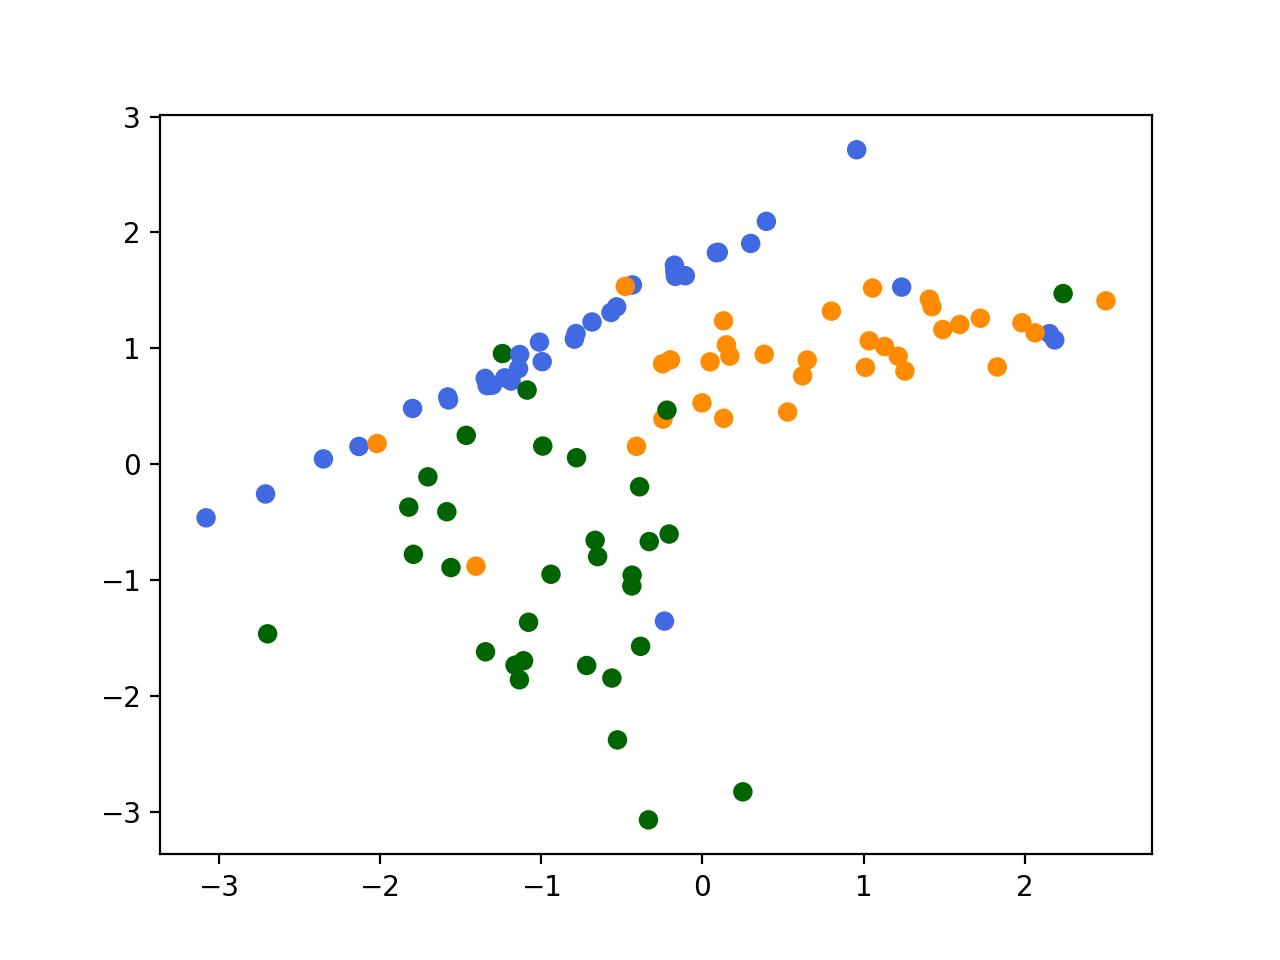

In [11]:
plt.figure()
color_list_light = ['bisque', 'palegreen', 'lightblue']
color_list_dark = ['darkorange', 'darkgreen', 'royalblue']
cmap_points = ListedColormap(color_list_dark)
plt.scatter(X[:,0], X[:,1],c = y, cmap = cmap_points)

#### a.2.2 Overfitting and Underfitting with kNN classifier

### Overfitting vs Underfitting. 
- Capturing global trends vs local trends (Good fit vs Overfit)
- Capturing global trends well vs failing to capture global trends well enough (good fit vs underfit) 
- Many reasons for overitting
  - **Ability to capture global trend relies on an important assumption:**
    - **Data is representative of future data that model will see, which might not be realistically true.** 
      - So, choice of training sample is definitely important for model to not overfit
      - Some model monitoring is required to flag when scoring data starts veering from the training set
      - We rely on this assumption, and create tests on test set to try as much as possible to not overfit 
    - Choice of hyperparameters  
      - k in KNN, low k leads to overfit , high k to underfit 
      - learning rate in GBM
    - Data sampling 
      - If a selection bias occurs in data sampling, can results in over or even under fit  
    - Too many features, not good variable selection  
      - Polynomial regression 

In [12]:
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier

In [13]:
def knn_classification(X,y,k,train_prop = 0.8):
    """Function to train a kNN classifier on train set. Expects X (2 features) and y as arrays,
    k as number of neighbors
    Returns:
    A plot of decision boundary after training, accuracy score on train and test"""
    X_train, X_test, y_train, y_test = train_test_split(X, y,train_size = train_prop , 
                                                        test_size = (1-train_prop))
    # Usually should ensure no rank 1 array, but KneighborClassifier expects y matrices to be rank 2 arrays
    print("Shapes of X_train = {0}, X_test = {1}, y_train = {2}, y_test = {3}"  
          .format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))
    #y_train = y_train.reshape((-1,1))
    #y_test = y_test.reshape((-1,1))
    #print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    model = KNeighborsClassifier(n_neighbors = k)
    
    # Below method shows that algorithm implementation is such that KNN memorizes the training data. More to be covered
    #later. Broadly, it memorizes it in a tree form
    model.fit(X_train, y_train)
    
    train_accuracy = model.score(X = X_train,y = y_train)
    test_accuracy = model.score(X = X_test,y = y_test)
    
    # Plotting decision boundary
    #1. Get a meshgrid using range values of two features
    # 2.Then use the trained model, to predict each record formed by mesh grid 
    #3. plot the region, using colors for region of each class
    
    x_axis_min = np.min(X_train[:,0])
    x_axis_max = np.max(X_train[:,0])
    y_axis_min = np.min(X_train[:,1])
    y_axis_max = np.max(X_train[:,1])

    mesh_step_size = 0.01
    xx, yy = np.meshgrid(np.arange(x_axis_min, x_axis_max + 1,mesh_step_size), 
               np.arange(y_axis_min, y_axis_max + 1, mesh_step_size))
    z = np.concatenate((xx.reshape(1,-1), yy.reshape(1,-1)), axis = 0)
    scored_mesh = model.predict(z.T)
    print("Shapes of arrays of meshgrid , arr1 = {0}, arr2 = {1}, scored_mesh = {2}" 
          .format(xx.shape, yy.shape, scored_mesh.shape))
    scored_mesh = scored_mesh.reshape(xx.shape)
    
    color_list_light = ['bisque', 'palegreen', 'lightblue']
    color_list_dark = ['darkorange', 'darkgreen', 'royalblue']
    cmap_points = ListedColormap(color_list_dark)
    cmap_region = ListedColormap(color_list_light)
    #plt.figure()
    plt.pcolormesh(xx,yy, scored_mesh, cmap = cmap_region)
    plt.scatter(X_train[:,0], X_train[:,1],c = y_train, cmap = cmap_points,
               s = 10, edgecolor = 'black')
    #plt.xlabel('Feature 0')
    #plt.ylabel('Feature 1')
    plt.xlim(x_axis_min, x_axis_max)
    plt.ylim(y_axis_min, y_axis_max)
    plt.title("k = {0}, Train Accuracy = {1}, Test Accuracy = {2}".format(k,train_accuracy, test_accuracy),
             fontsize = 'xx-small')
    plt.tick_params(axis = 'both', labelsize = 'xx-small')
    #plt.subplots_adjust(hspace = 0.3)
    plt.tight_layout()

- First two charts for k = 1 show you how accuracy on test set is dependent on random chance of getting a test set 
- For small values of k, model learns small patterns, not general patterns, hence it is more complex(shown through
  decision boundary), and has low bias (train error 0). But does not perform well on test set as well(higher variance)
- As k increases, complexity decreases, in fact test accuracy reaches max for k =5 when train accuracy is least

<IPython.core.display.Javascript object>


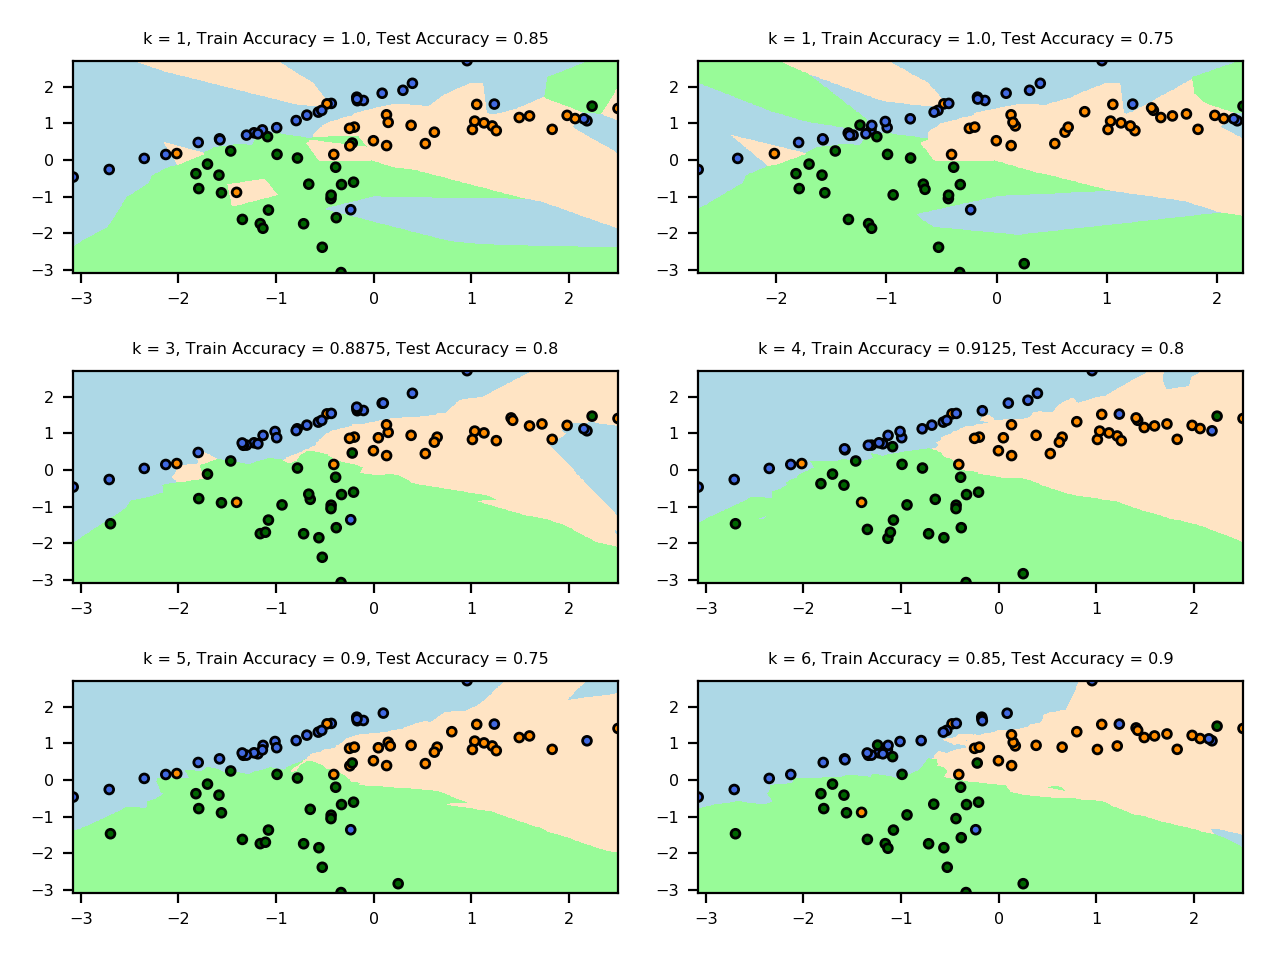

Shapes of X_train = (80, 2), X_test = (20, 2), y_train = (80,), y_test = (20,)
Shapes of arrays of meshgrid , arr1 = (679, 659), arr2 = (679, 659), scored_mesh = (447461,)
Shapes of X_train = (80, 2), X_test = (20, 2), y_train = (80,), y_test = (20,)
Shapes of arrays of meshgrid , arr1 = (679, 595), arr2 = (679, 595), scored_mesh = (404005,)
Shapes of X_train = (80, 2), X_test = (20, 2), y_train = (80,), y_test = (20,)
Shapes of arrays of meshgrid , arr1 = (679, 659), arr2 = (679, 659), scored_mesh = (447461,)
Shapes of X_train = (80, 2), X_test = (20, 2), y_train = (80,), y_test = (20,)
Shapes of arrays of meshgrid , arr1 = (679, 659), arr2 = (679, 659), scored_mesh = (447461,)
Shapes of X_train = (80, 2), X_test = (20, 2), y_train = (80,), y_test = (20,)
Shapes of arrays of meshgrid , arr1 = (679, 659), arr2 = (679, 659), scored_mesh = (447461,)
Shapes of X_train = (80, 2), X_test = (20, 2), y_train = (80,), y_test = (20,)
Shapes of arrays of meshgrid , arr1 = (679, 659), arr2 = (679

In [14]:
plt.figure()
plt.subplot(3,2,1)
knn_classification(X,y,k=1)
plt.subplot(3,2,2)
knn_classification(X,y,k=1)
plt.subplot(3,2,3)
knn_classification(X,y,k=3)
plt.subplot(3,2,4)
knn_classification(X,y,k=4)
plt.subplot(3,2,5)
knn_classification(X,y,k=5)
plt.subplot(3,2,6)
knn_classification(X,y,k=6)

#### b. kNN for regression
- kNN for regression problem, works similarly, just the y values of k neighbor is combined by default by
  taking their mean 
- The evaluation metric by default is R squared / coefficient of determination i.e how much of variation 
  is explained. 
 $$R^2 = \frac{ESS}{TSS}$$  
 ESS = TSS - RSS

<IPython.core.display.Javascript object>


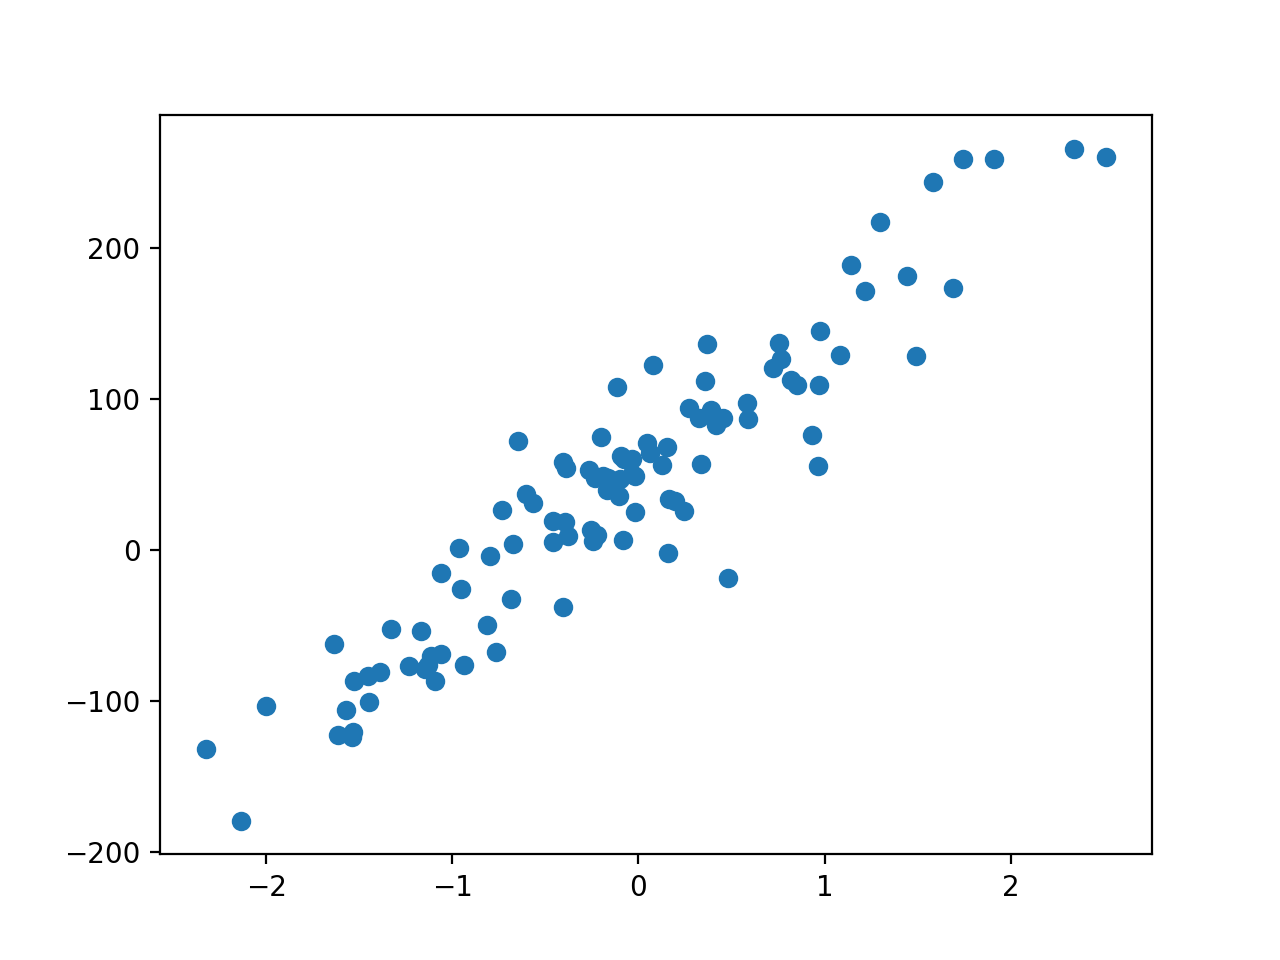

In [15]:
X, y = make_regression(n_samples= 100, n_features= 1, n_informative= 1, 
                n_targets= 1, bias = 50, noise = 30 )
plt.figure()
plt.scatter(X,y)

In [16]:
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor

In [17]:
def knn_regression(X,y,k,train_prop = 0.8):
    """Function to split data into train, test with one feature; train a kNN regression, score 
    on test set.
    Returns a plot with decision boundary learnt, and Rsquare on train and test set"""
    X_train, X_test, y_train, y_test = train_test_split(X, y,train_size = train_prop , 
                                                        test_size = (1-train_prop),random_state = 123)
    print("Shapes of X_train = {0}, X_test = {1}, y_train = {2}, y_test = {3}"  
          .format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))
    model = KNeighborsRegressor(n_neighbors = k)
    model.fit(X_train, y_train)
    train_r_sq = model.score(X_train, y_train)
    test_r_sq = model.score(X_test, y_test)
    
    #Construct a series to score using the model, for drawing decision boundary
    x_axis_min = np.min(X_train)
    x_axis_max = np.max(X_train)
    step_size = 0.1
    xx = np.arange(x_axis_min, x_axis_max + 1, step_size).reshape(-1,1)
    print(xx.shape)
    yy = model.predict(xx)
    plt.scatter(X_train, y_train, c = 'royalblue', s = 15, marker = 'o', alpha = 0.5)
    #plt.scatter(xx,yy, c = 'red', marker = 'o', 
    #            s = 15,edgecolor = 'black', alpha = 0.6)
    plt.plot(xx,yy,color = 'red', marker = 'o', markeredgecolor= 'black', 
             linestyle = '-', ms = 3, alpha = 0.5)
    plt.xlim(x_axis_min, x_axis_max)
    plt.title("k = {0}, \n Train R Sq = {1}, \n Test R Sq = {2}".format(k,train_r_sq, test_r_sq),
             fontsize = 'xx-small')
    plt.tick_params(axis = 'both', labelsize = 'xx-small')
    #plt.subplots_adjust(hspace = 0.3)
    plt.tight_layout()


##### Can see k = 1 to k = 3, make model go from overfitting to becoming better, them for k = 50, it underfits, both
trianing and test errors drop

<IPython.core.display.Javascript object>


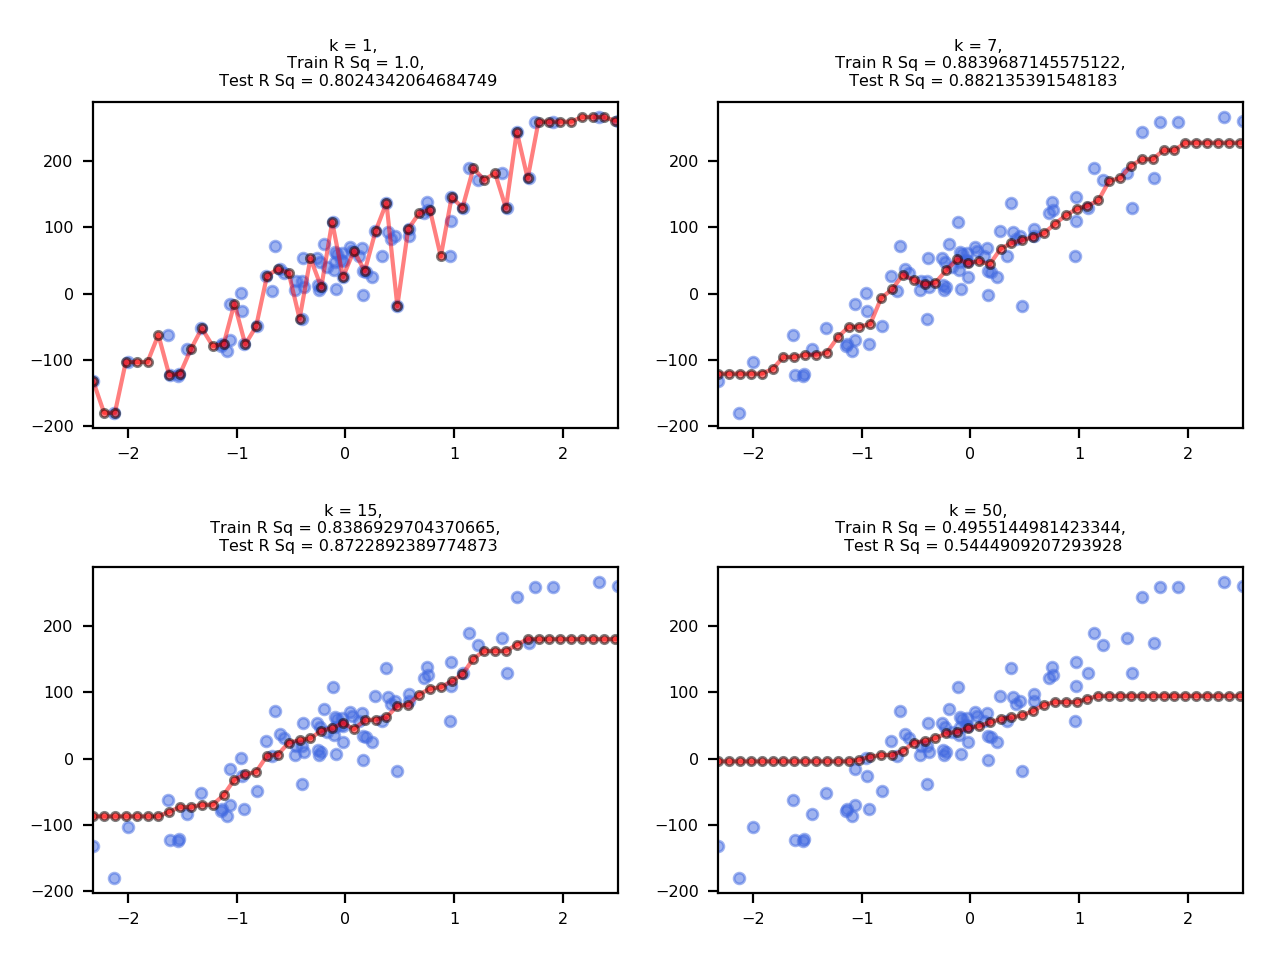

Shapes of X_train = (80, 1), X_test = (20, 1), y_train = (80,), y_test = (20,)
(59, 1)
Shapes of X_train = (80, 1), X_test = (20, 1), y_train = (80,), y_test = (20,)
(59, 1)
Shapes of X_train = (80, 1), X_test = (20, 1), y_train = (80,), y_test = (20,)
(59, 1)
Shapes of X_train = (80, 1), X_test = (20, 1), y_train = (80,), y_test = (20,)
(59, 1)


In [18]:
plt.figure()
plt.subplot(2,2,1)
knn_regression(X,y,k=1)
plt.subplot(2,2,2)
knn_regression(X,y,k=7)
plt.subplot(2,2,3)
knn_regression(X,y,k=15)
plt.subplot(2,2,4)
knn_regression(X,y,k=50)

In [19]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>

#### c. Pros and Cons of knn 

|Pros|Cons
|:-|:-|
|1.Simple to understand, no assumptions are made on distribution of data|1. If no. of features are many, can be slow to train|
|2.Good to set a benchmark|2. Performance esp. decreases if data is sparse, with many features|
|3. -|3. Performance changes with small changes in data, so is'nt it good to detect shifts in real world data compared to training data|
